## Introduction

The Student Performance dataset contains academic and behavioral information of students along with their final performance scores.

The goal of this project is to build machine learning models that classify whether a student will Pass or Fail based on:

- Hours Studied
- Previous Scores
- Extracurricular Activities
- Sleep Hours
- Sample Question Papers Practiced

We compare the performance of K-Nearest Neighbors, Logistic Regression and Naive Bayes models.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(r"C:\Users\Neel Arora\OneDrive\Desktop\CSV Files\Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


## Data Preprocessing

We convert Extracurricular Activities into 0/1 and Performance Index into Pass/Fail.


In [5]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
df['Result'] = df['Performance Index'].apply(lambda x: 1 if x >= 60 else 0)


## Visualization

Hours Studied and Previous Scores are compared and colored according to Result (Pass/Fail).


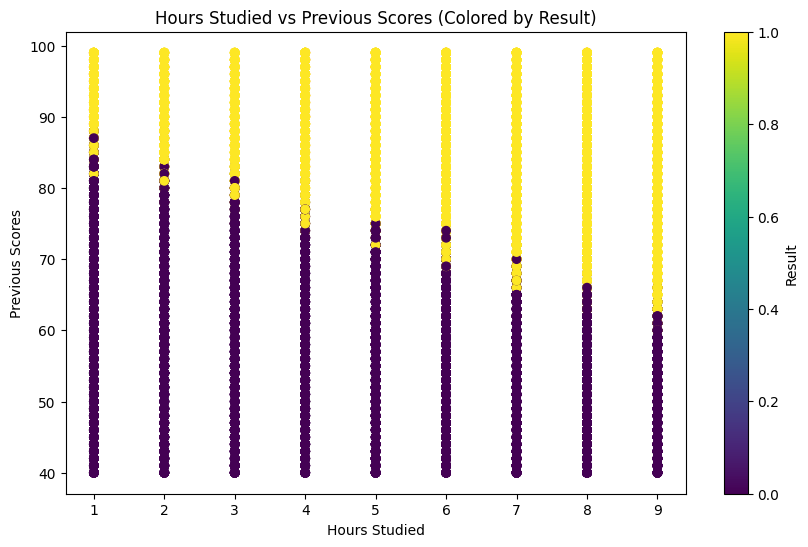

In [6]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["Hours Studied"],
    df["Previous Scores"],
    c=df["Result"],
    cmap="viridis"
)

plt.xlabel("Hours Studied")
plt.ylabel("Previous Scores")
plt.title("Hours Studied vs Previous Scores (Colored by Result)")
plt.colorbar(scatter, label="Result")
plt.show()


## Selecting Input and Output Columns


In [7]:
X = df[['Hours Studied',
        'Previous Scores',
        'Extracurricular Activities',
        'Sleep Hours',
        'Sample Question Papers Practiced']]

Y = df['Result']


## Train-Test Split


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


## Machine Learning Models


In [9]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB()
}


## Model Training and Evaluation


In [10]:
for name, model in models.items():
    print("\n==============================")
    print(name)
    print("==============================")

    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    score = accuracy_score(y_test, pred)
    print(f"Accuracy Score: {score:.3f}")

    cm = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(cm)



KNN
Accuracy Score: 0.971
Confusion Matrix:
[[1111   31]
 [  27  831]]

Logistic Regression
Accuracy Score: 0.978
Confusion Matrix:
[[1119   23]
 [  21  837]]

Naive Bayes
Accuracy Score: 0.923
Confusion Matrix:
[[1049   93]
 [  61  797]]
